# 神经网络模型的应用——MNIST手写识别

In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [36]:
import numpy as np
import matplotlib.pyplot as plt

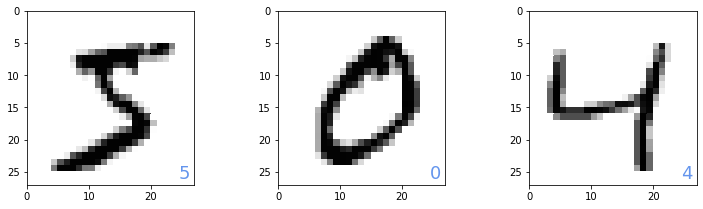

In [37]:
plt.figure(figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for i in range(3):
    plt.subplot(1,3,i+1)
    img = x_train[i,:,:]
    plt.pcolor(255-img)
    plt.text(24.5,26,f'{y_train[i]:d}',color = 'cornflowerblue',fontsize = 18)
    plt.xlim(0,27)
    plt.ylim(27,0)
plt.show()

## 简单的二层前馈神经网络(FNN)

### Sigmoid模型
激活函数：Sigmoid

算法：Adam（Adaptive moment estimation 自适应矩估计）

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
x_train = x_train.reshape(60000,784)
x_train = x_train.astype('float32')
x_train /= 255                                   # 转换为0-1的数值
num_classes = 10
y_train = to_categorical(y_train,num_classes)    # 转换为1-of-K表示

x_test = x_test.reshape(10000,784)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test,num_classes)

In [40]:
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [41]:
model = Sequential()
model.add(Dense(16,input_dim = 784,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [42]:
import time
start = time.time()
history = model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print(f'Computation time: {(time.time()-start):.3f}')

Epoch 1/10
60/60 [==============================] - 1s 6ms/step - loss: 2.0041 - accuracy: 0.3980 - val_loss: 1.7069 - val_accuracy: 0.6687
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.5289 - accuracy: 0.7558 - val_loss: 1.3515 - val_accuracy: 0.8128
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 1.2326 - accuracy: 0.8225 - val_loss: 1.1046 - val_accuracy: 0.8437
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 1.0202 - accuracy: 0.8488 - val_loss: 0.9261 - val_accuracy: 0.8589
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.8660 - accuracy: 0.8626 - val_loss: 0.7961 - val_accuracy: 0.8708
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7531 - accuracy: 0.8724 - val_loss: 0.6993 - val_accuracy: 0.8781
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.8803 - val_loss: 0.6270 - val_accuracy: 0.8851
Epoch 8/10
60/60 [==

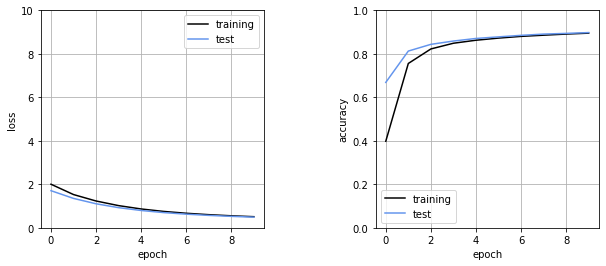

In [43]:
plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
plt.plot(history.history['loss'],label = 'training',color = 'k')
plt.plot(history.history['val_loss'],label = 'test',color = 'cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'training',color = 'k')
plt.plot(history.history['val_accuracy'],label = 'test',color = 'cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

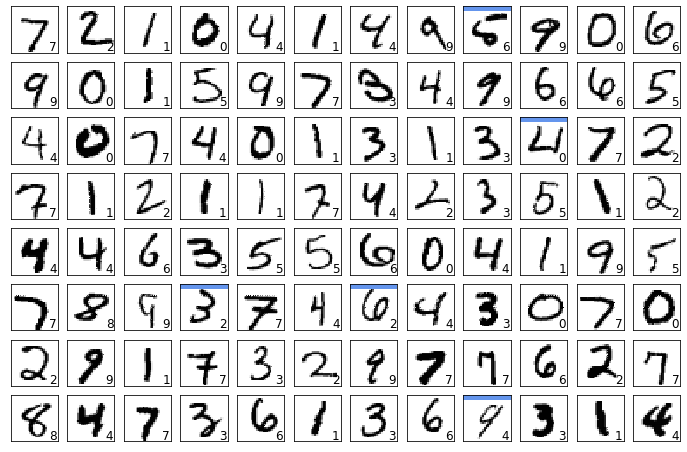

In [62]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x = x_test[i,:].reshape(28,28)
        plt.pcolor(1-x)
        wk = y[i,:]
        prediction = np.argmax(wk)
        plt.text(22,25.5,f'{prediction:d}',fontsize = 12)
        if prediction != np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color = 'cornflowerblue',lw = 5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],'')
        plt.yticks([],'')


show_prediction()
plt.show()

### ReLU模型
激活函数：ReLU（Rectified Linear Unit 线性整流函数）

算法：Adam

ReLU:$$h(x)\begin{cases}
  x& x>0 \\
  0& x\le 0
\end{cases}$$

In [56]:
np.random.seed(1)

model = Sequential()
model.add(Dense(16,input_dim = 784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [59]:
import time
start = time.time()
history = model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print(f'Computation time: {(time.time()-start):.3f}')

Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.9272 - val_loss: 0.2602 - val_accuracy: 0.9245
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2537 - accuracy: 0.9285 - val_loss: 0.2545 - val_accuracy: 0.9271
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2484 - accuracy: 0.9299 - val_loss: 0.2498 - val_accuracy: 0.9275
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.9315 - val_loss: 0.2470 - val_accuracy: 0.9280
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2382 - accuracy: 0.9325 - val_loss: 0.2445 - val_accuracy: 0.9285
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.9341 - val_loss: 0.2392 - val_accuracy: 0.9307
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.9351 - val_loss: 0.2354 - val_accuracy: 0.9321
Epoch 8/10
60/60 [==

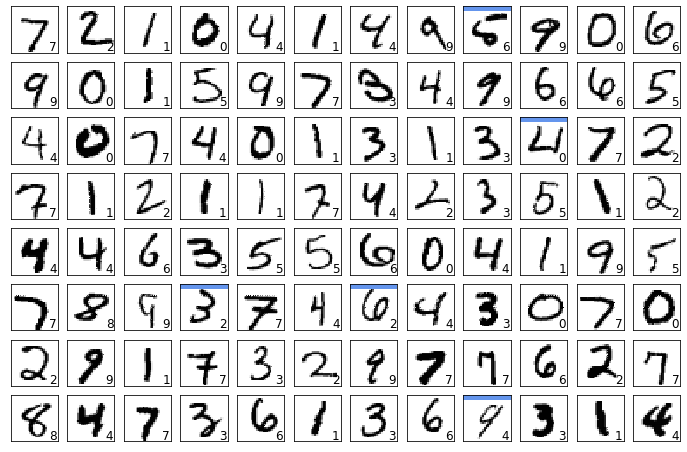

In [60]:
show_prediction()
plt.show()

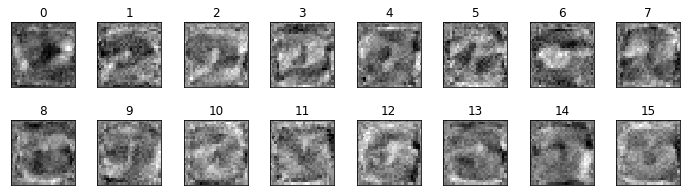

In [64]:
w = model.layers[0].get_weights()[0]
plt.figure(1,figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35,hspace=0.5)
for i in range(16):
    plt.subplot(2,8,i+1)
    w1 = w[:,i]
    w1 = w1.reshape(28,28)
    plt.pcolor(-w1)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],'')
    plt.yticks([],'')
    plt.title(f'{i:d}')

plt.show()

## 卷积神经网络（Convolution Neural Network，CNN）

卷积计算（3*3过滤器）：$$g(i,j)=\sum_{u=-1}^{1}\sum_{v=-1}^{1}x(i+u,j+v)h(u+1,v+1)$$

In [65]:
%reset

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1).astype('float32') / 255
x_test = x_test.reshape(10000,28,28,1).astype('float32') / 255
num_classes = 10
y_train = to_categorical(y_train,num_classes=num_classes)
y_test = to_categorical(y_test,num_classes=num_classes)


In [3]:
import matplotlib.pyplot as plt

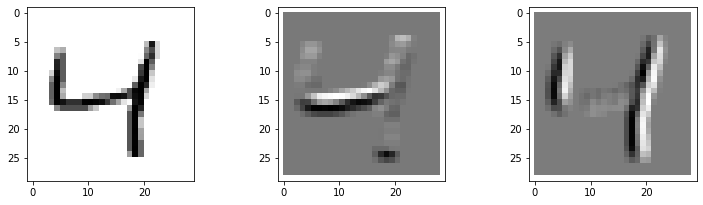

In [4]:
id_img = 2
myfill = np.array([[1,1,1],
                   [1,1,1],
                   [-2,-2,-2]],dtype = float) # 识别横边
myfill2 = np.array([[-2,1,1],
                   [-2,1,1],
                   [-2,1,1]],dtype = float)   # 识别纵边
x_img = x_train[id_img,:,:,0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for h in range(img_h-3+1):
    for w in range(img_w-3+1):
        img_part = x_img[h:h+3,w:w+3]
        out_img1[h+1,w+1] = np.dot(img_part.reshape(-1),myfill.reshape(-1))
        out_img2[h+1,w+1] = np.dot(img_part.reshape(-1),myfill2.reshape(-1))

plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(131)
plt.pcolor(1-x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(132)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(133)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

### 8个3*3过滤器的简单神经网络
填充：1

步长：1

激活函数：ReLU

算法：Adam

In [11]:
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
import time

In [24]:
model = Sequential()
# 8个3*3过滤器，通过填充边框宽度为1保持图像卷积后与原来相同，输入为28*28像素的图像，1表示黑白，若为彩色，为3，使用ReLU作为激活函数，使用默认的偏置输入
# 通过学习决定过滤器的值并通过ReLU处理
model.add(Conv2D(8,(3,3),padding='same',input_shape = (28,28,1),activation='relu'))
# 将（小批量大小，过滤器数量，输出高度，输出宽度）四维信息转换为（小批量大小，过滤器数量*输出高度*输出宽度）二维信息，方便全连接曾的输入
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [25]:
start = time.time()
history = model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print(f'Computation time:{(time.time()-start):.3f} sec')

Epoch 1/20
60/60 [==============================] - 1s 10ms/step - loss: 0.9252 - accuracy: 0.7945 - val_loss: 0.3729 - val_accuracy: 0.8980
Epoch 2/20
60/60 [==============================] - 0s 8ms/step - loss: 0.3336 - accuracy: 0.9047 - val_loss: 0.2816 - val_accuracy: 0.9202
Epoch 3/20
60/60 [==============================] - 0s 8ms/step - loss: 0.2720 - accuracy: 0.9229 - val_loss: 0.2435 - val_accuracy: 0.9307
Epoch 4/20
60/60 [==============================] - 0s 8ms/step - loss: 0.2363 - accuracy: 0.9327 - val_loss: 0.2145 - val_accuracy: 0.9386
Epoch 5/20
60/60 [==============================] - 0s 8ms/step - loss: 0.2073 - accuracy: 0.9412 - val_loss: 0.1897 - val_accuracy: 0.9461
Epoch 6/20
60/60 [==============================] - 0s 8ms/step - loss: 0.1851 - accuracy: 0.9474 - val_loss: 0.1772 - val_accuracy: 0.9505
Epoch 7/20
60/60 [==============================] - 0s 8ms/step - loss: 0.1669 - accuracy: 0.9528 - val_loss: 0.1584 - val_accuracy: 0.9564
Epoch 8/20
60/60 [=

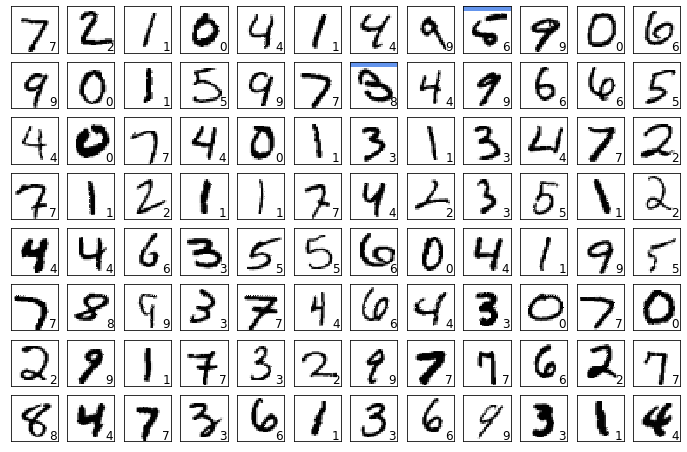

In [8]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x = x_test[i,:].reshape(28,28)
        plt.pcolor(1-x)
        wk = y[i,:]
        prediction = np.argmax(wk)
        plt.text(22,25.5,f'{prediction:d}',fontsize = 12)
        if prediction != np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color = 'cornflowerblue',lw = 5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],'')
        plt.yticks([],'')

show_prediction()
plt.show()

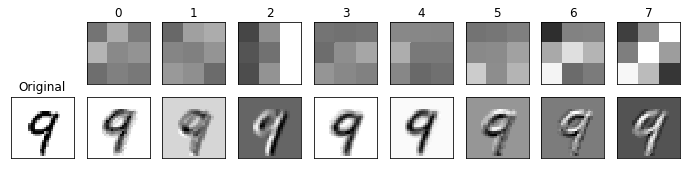

In [10]:
plt.figure(1,figsize=(12,2.5))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img,:,:,0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)
plt.pcolor(-x_img)
plt.xlim(0,img_h)
plt.ylim(img_w,0)
plt.xticks([],'')
plt.yticks([],'')
plt.title('Original')

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2,9,i+2)
    w1 = w[:,:,0,i]
    w1 = w1.reshape(3,3)
    plt.pcolor(-w1,vmin=min_w,vmax=max_w)
    plt.xlim(0,3)
    plt.ylim(3,0)
    plt.xticks([],'')
    plt.yticks([],'')
    plt.title(f'{i:d}')
    plt.subplot(2,9,i+11)
    out_img = np.zeros_like(x_img)
    for ih in range(img_h-3+1):
        for iw in range(img_w-3+1):
            img_part = x_img[ih:ih+3,iw:iw+3]
            out_img[ih+1,iw+1] = np.dot(img_part.reshape(-1),w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0,img_h)
    plt.ylim(img_w,0)
    plt.xticks([],'')
    plt.yticks([],'')
plt.show()

### 使用池化处理和Dropout处理的多层神经网络

In [12]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])



使用CPU进行计算
```Python
start = time.time()
import tensorflow as tf
with tf.device('/cpu:0'):
    history = model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
    score = model.evaluate(x_test,y_test,verbose = 0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print(f'Computation time:{(time.time()-start):.3f} sec')
```
时间约500s

In [20]:
start = time.time()
import tensorflow as tf
with tf.device('/gpu:0'):
    history = model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
    score = model.evaluate(x_test,y_test,verbose = 0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print(f'Computation time:{(time.time()-start):.3f} sec')

Epoch 1/20
60/60 [==============================] - 2s 32ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0201 - val_accuracy: 0.9954
Epoch 2/20
60/60 [==============================] - 2s 32ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0228 - val_accuracy: 0.9948
Epoch 3/20
60/60 [==============================] - 2s 31ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0211 - val_accuracy: 0.9949
Epoch 4/20
60/60 [==============================] - 2s 31ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0247 - val_accuracy: 0.9943
Epoch 5/20
60/60 [==============================] - 2s 31ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0236 - val_accuracy: 0.9949
Epoch 6/20
60/60 [==============================] - 2s 31ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0244 - val_accuracy: 0.9946
Epoch 7/20
60/60 [==============================] - 2s 31ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0241 - val_accuracy: 0.9942
Epoch 8/20
60

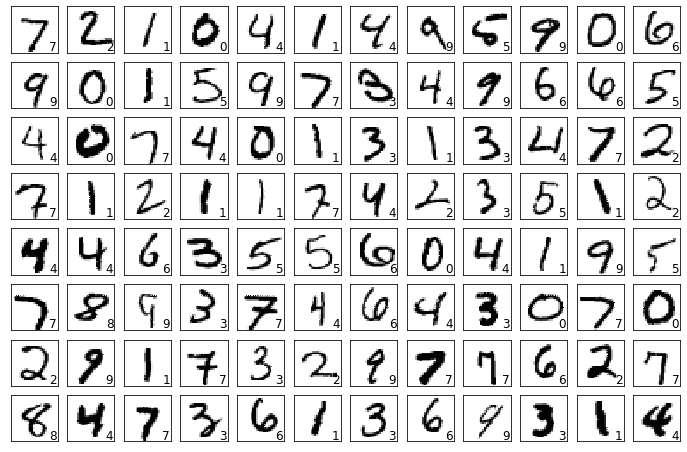

In [21]:
show_prediction()
plt.show()